In [1]:
from Algorithm_Functions import *

#Main Libraries 
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import datetime
import scipy.fftpack
#import tensorflow as tf
#from tensorflow import keras # And the tf and keras framework, thanks to Google
#from tensorflow.python.framework import ops
import scipy.io as io
from io import BytesIO
import sys, os, time
import math
from scipy.fft import fft, fftfreq #Fourier
import pywt # Wavelet
from tqdm import tqdm # for print progress <---------------------------------------------------
#import cv2 # computer vision problems library
from scipy.spatial import Delaunay # Delaunay triangulation <-- need it for Alpha Shape
from skimage.restoration import denoise_wavelet #Noise
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.manifold import TSNE
import time
from IPython.display import Audio # <---- play audio

#Extra Libraries 
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm
from scipy.spatial.distance import pdist, squareform
import random
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns #I used sns.distplot because it has more manual properties than plt.hist()
from scipy.stats import pearsonr #includes the PCC function

#--------------------------------------------------------------------- Path to Save Compressed Sub Wavelet Data
signal_o_1 = "Data_Time_Signal_Denoised_Normalized/o_1.mat" 
signal_o_2 = "Data_Time_Signal_Denoised_Normalized/o_2.mat"
signal_o_3 = "Data_Time_Signal_Denoised_Normalized/o_3.mat" 
signal_o_4 = "Data_Time_Signal_Denoised_Normalized/o_4.mat" 
signal_o_5 = "Data_Time_Signal_Denoised_Normalized/o_5.mat" 
signal_o_6 = "Data_Time_Signal_Denoised_Normalized/o_6.mat" 
signal_o_7 = "Data_Time_Signal_Denoised_Normalized/o_7.mat" 
signal_o_8 = "Data_Time_Signal_Denoised_Normalized/o_8.mat" 
#------------------------------
signal_c_1 = "Data_Time_Signal_Denoised_Normalized/c_1.mat"  
signal_c_2 = "Data_Time_Signal_Denoised_Normalized/c_2.mat" 
signal_c_3 = "Data_Time_Signal_Denoised_Normalized/c_3.mat"
signal_c_4 = "Data_Time_Signal_Denoised_Normalized/c_4.mat"
signal_c_5 = "Data_Time_Signal_Denoised_Normalized/c_5.mat"

signal_dp_1 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_1"
signal_dp_2 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_2"
signal_dp_3 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_3"
signal_dp_4 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_4"
signal_dp_5 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_5"
signal_dp_6 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_6"
signal_dp_7 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_7"
signal_dp_8 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_8"
signal_dp_9 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_9"
signal_dp_10 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_10"
signal_dp_11 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_11"
signal_dp_12 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_12"
signal_dp_13 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_13"
signal_dp_14 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_14"
signal_dp_15 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_15"
signal_dp_16 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_16"
signal_dp_17 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_17"
signal_dp_18 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_18"
signal_dp_19 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_19"
signal_dp_20 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_20"
signal_dp_21 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_21"
signal_dp_22 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_22"
signal_dp_23 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_23"
signal_dp_24 = "D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_24"

In [9]:
signal_path = signal_dp_17

#---------------------------- Load Wavelet data
signal_trackdata = io.loadmat(signal_path)
signal_data = signal_trackdata['saved_data'];
print(signal_data.shape)  

(125, 1100000)


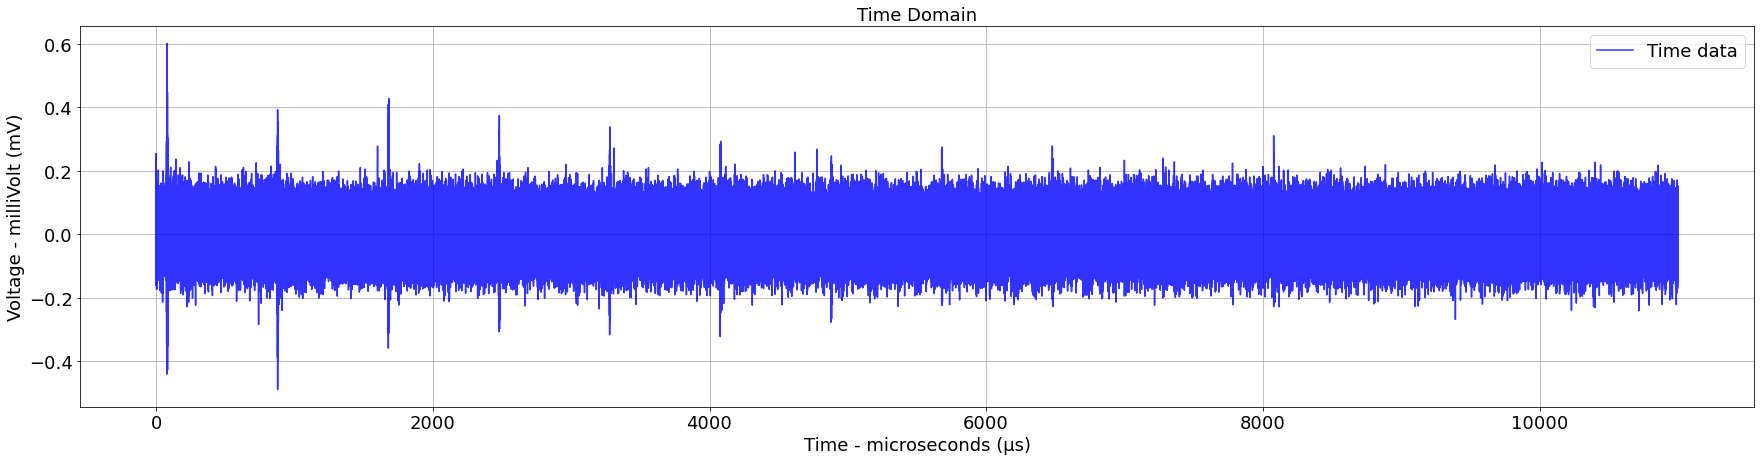

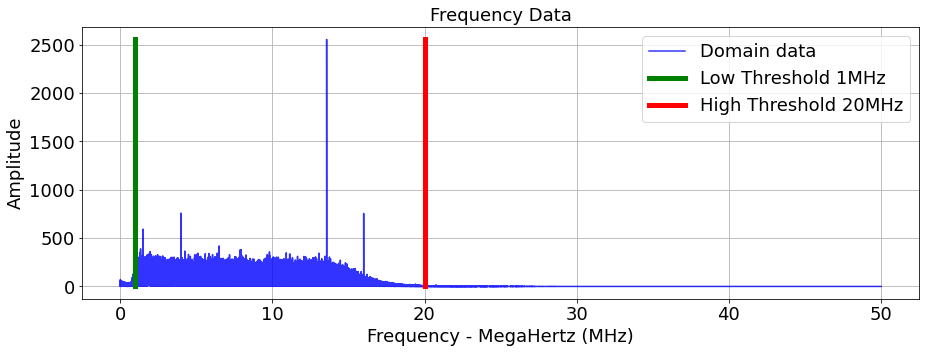

In [8]:
burst_data = signal_data[6]
#------------------------------------------------------------------------------- PLOT: Normalized Denoised Time Signal
Plot_Time_Signal(burst_data)

#------------------------------------------------------------------------------- PLOT: Normalized Denoised Time Signal
Plot_FFT_Signal(burst_data,True)

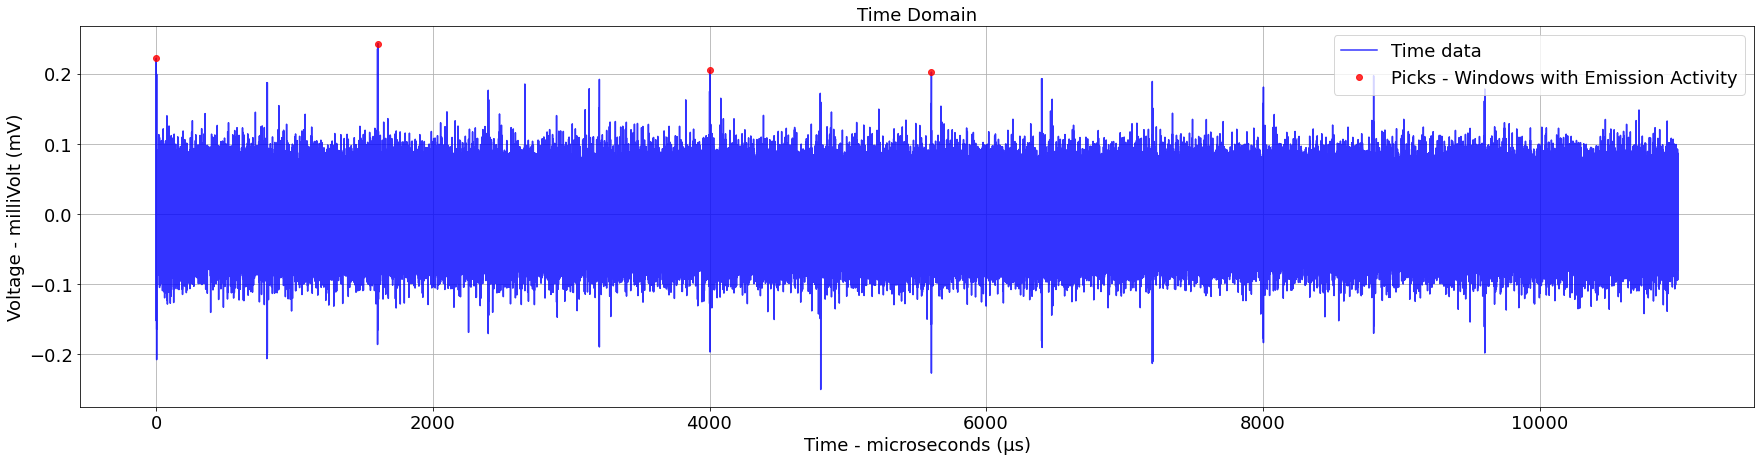

In [50]:
spikes_list_location, spikes_list_amplitude = Spikes_Location_and_Amplitude(burst_data,0.2,2000)  #------------------------------------ find the frames with activity and their amplitude

Plot_Time_Signal_with_Spikes(burst_data,spikes_list_location,spikes_list_amplitude)

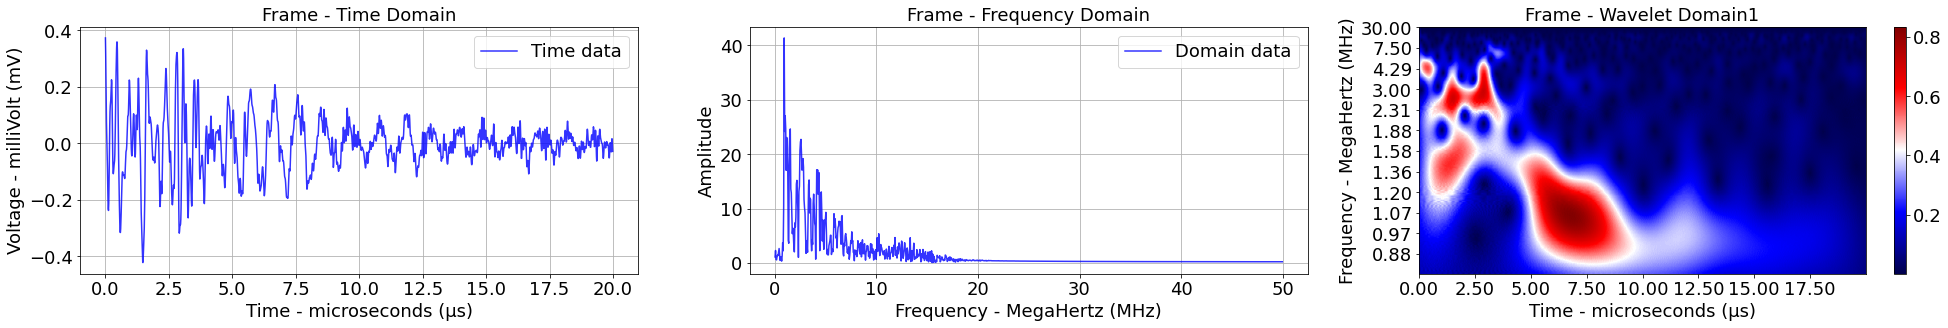

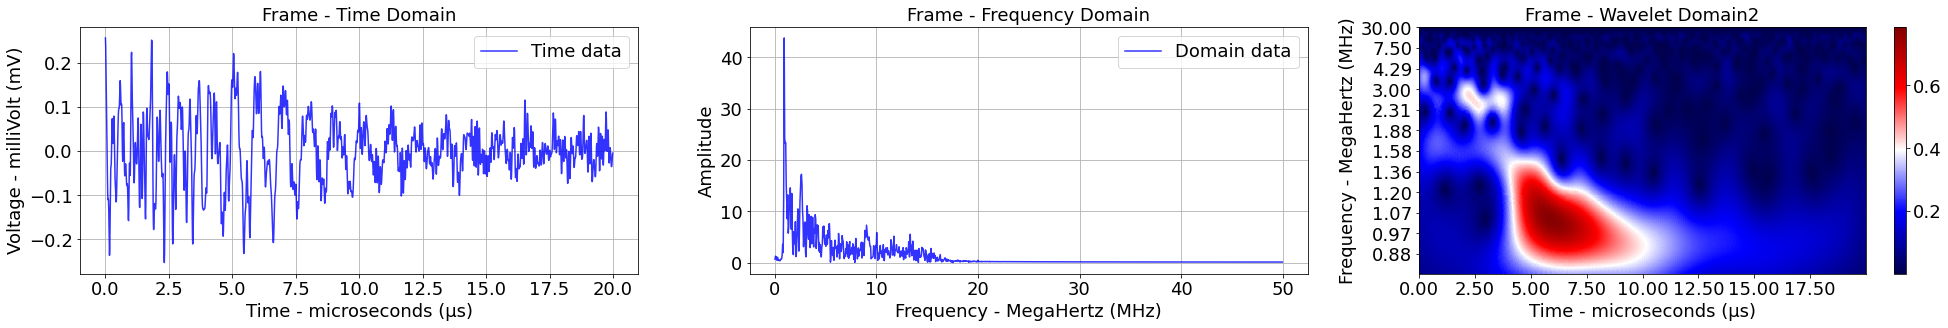

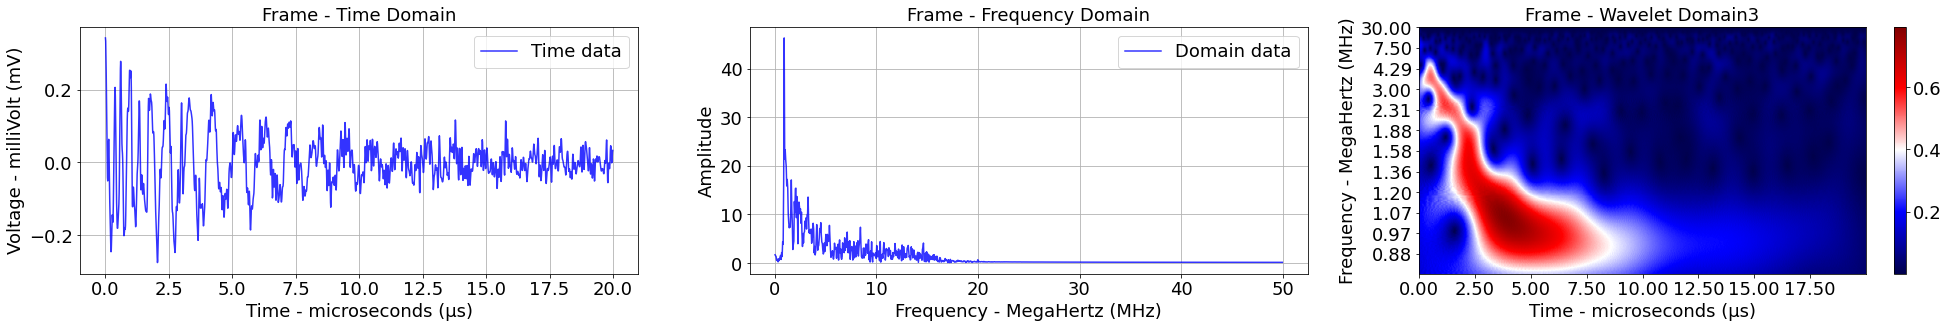

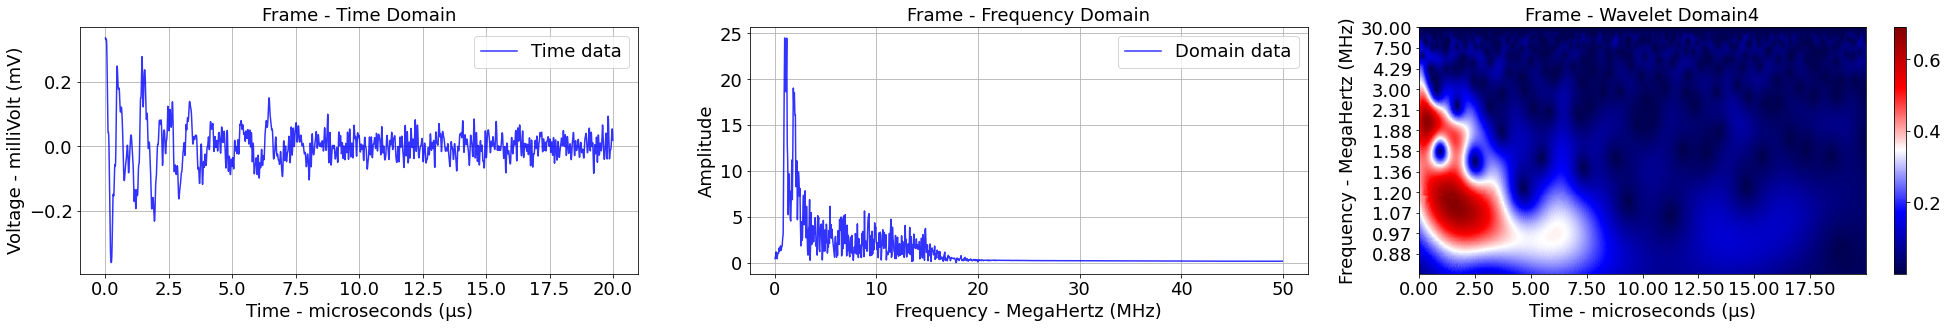

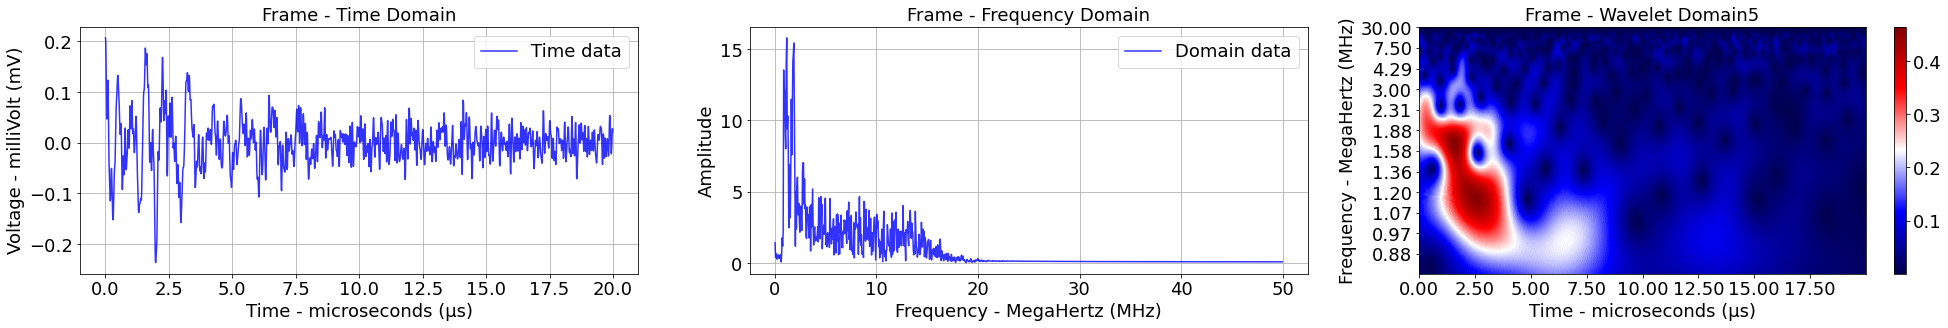

In [5]:
frame_size = 2000
sub_array_size=500
widths = np.arange(5, 185) 
bandwidth = 0.8
center_frequency = 1.5
Plot_Frame_Time_FFT_CTW(spikes_list_location,burst_data,frame_size,widths,bandwidth,center_frequency)

--------------------- D:/Ultrasound/Data_Time_Signal_Denoised_Normalized/dp_15
13


  0%|          | 0/1 [00:00<?, ?it/s]

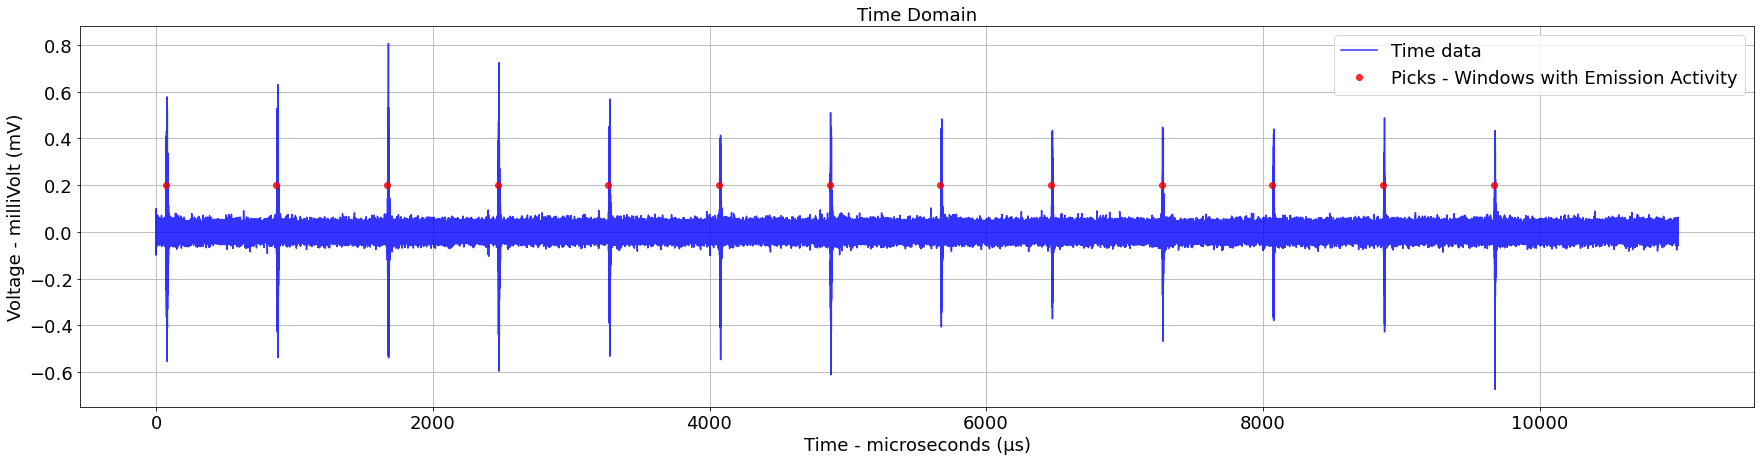

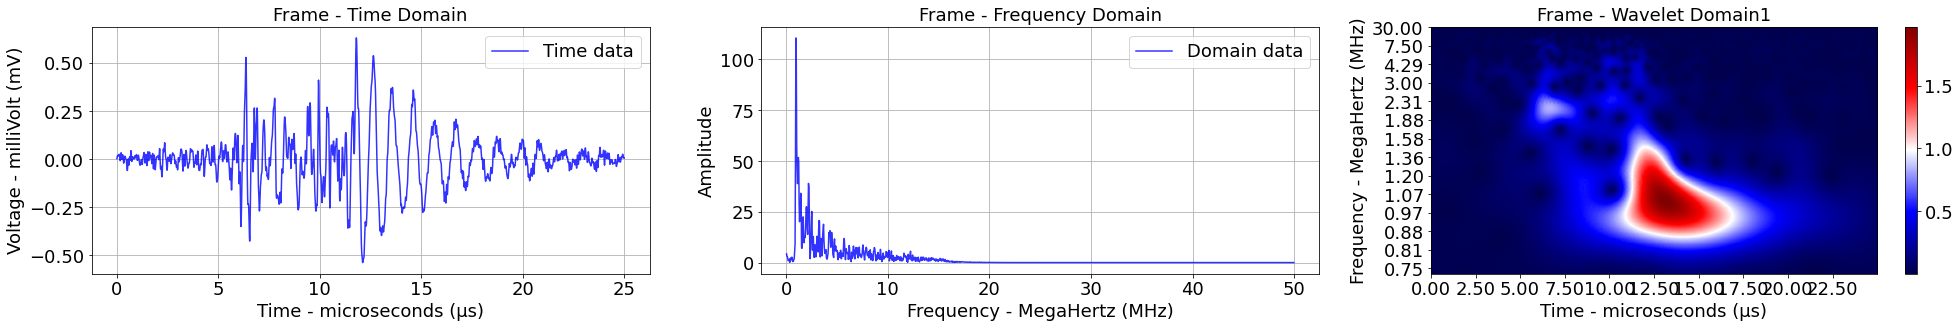

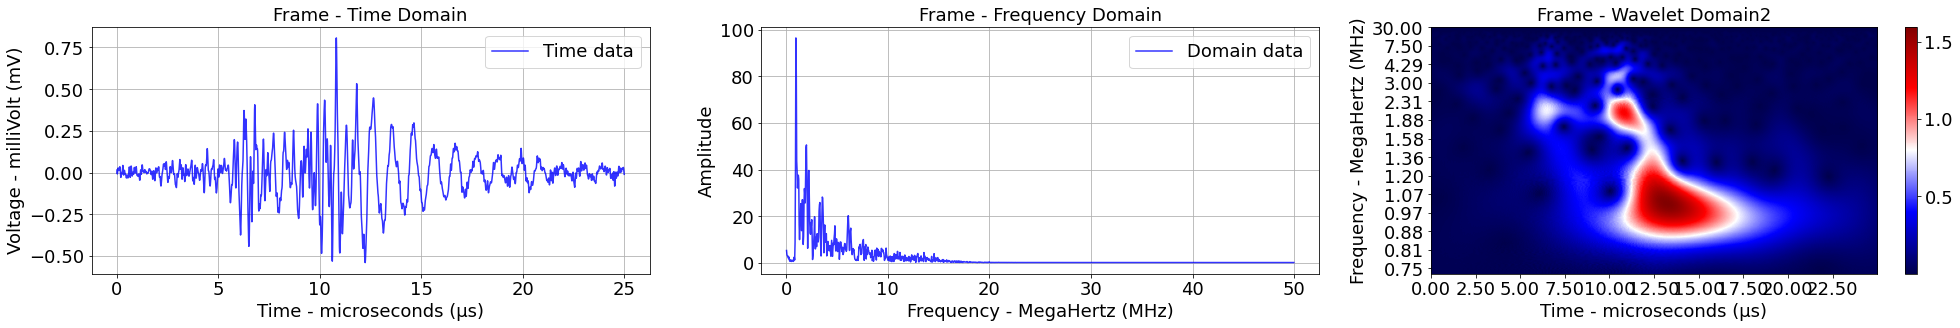

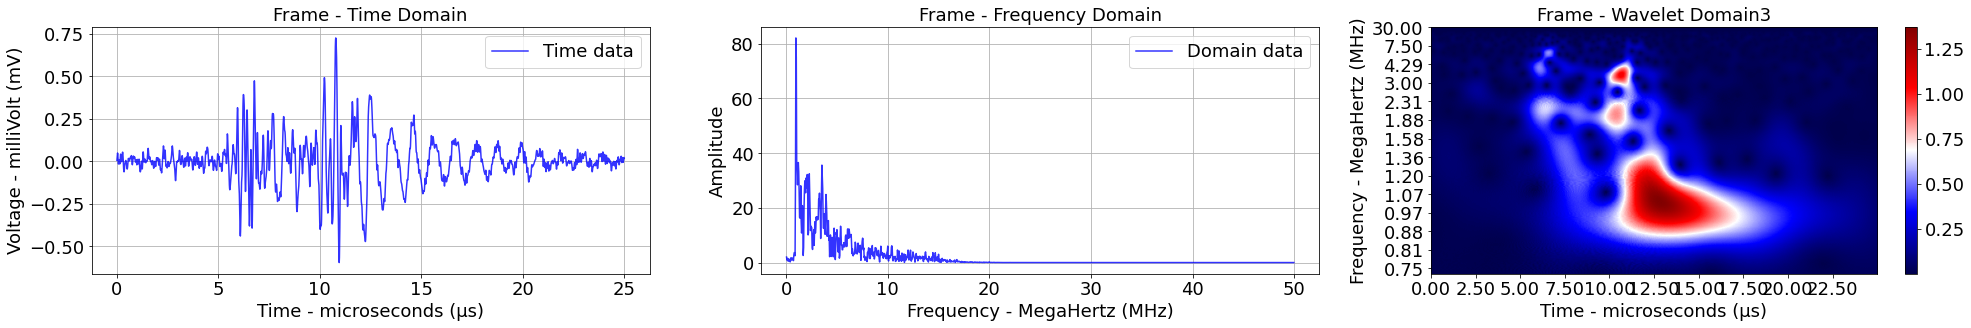

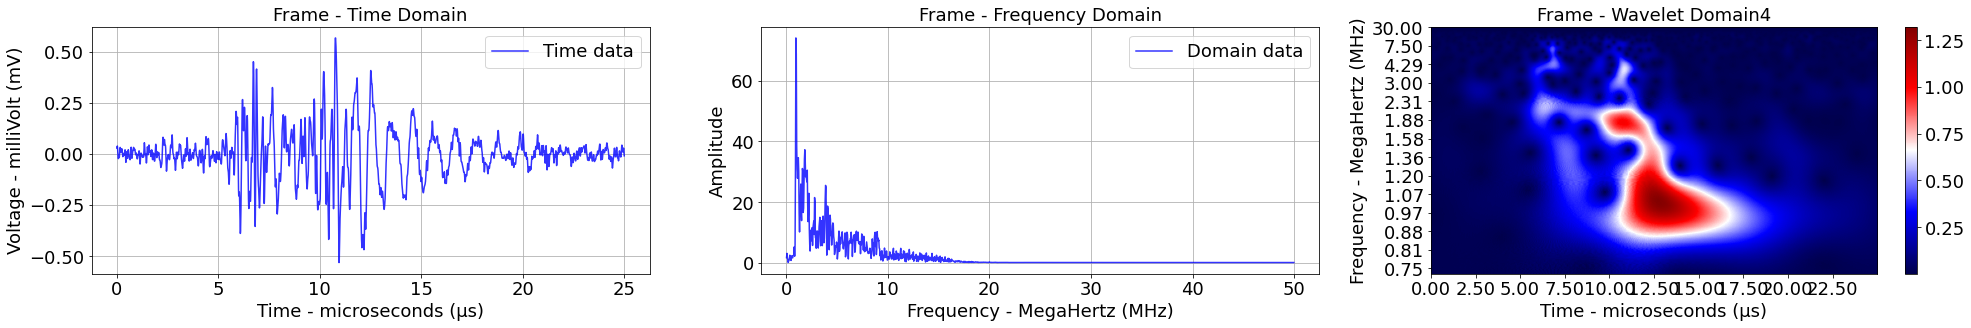

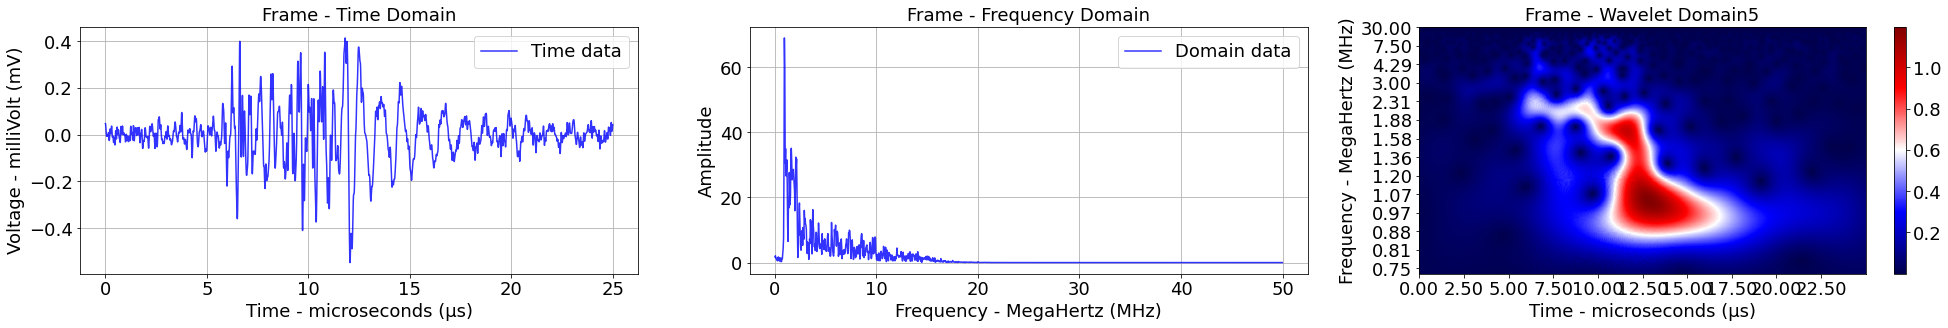

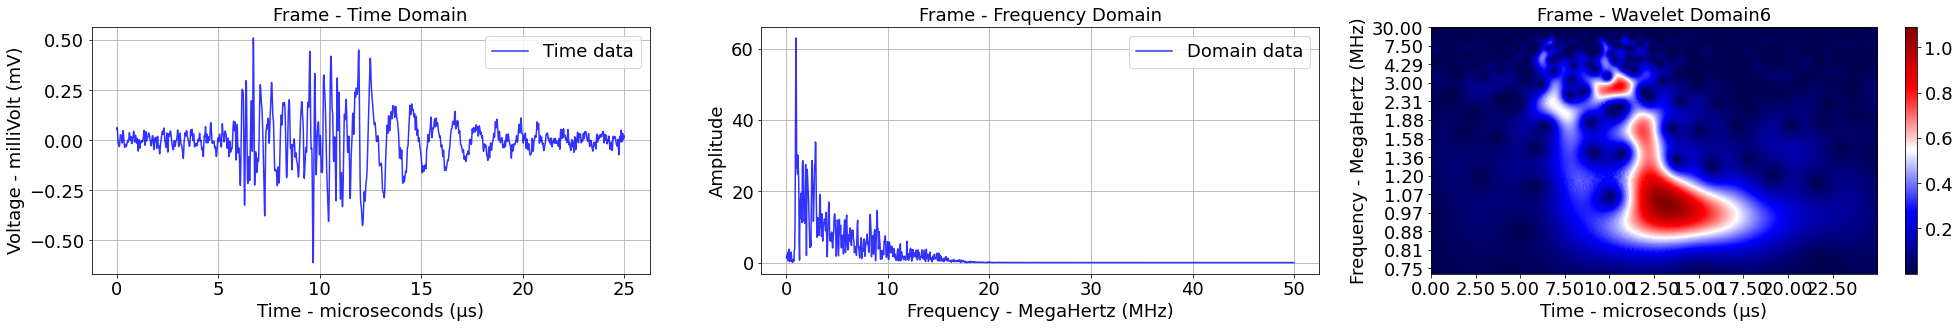

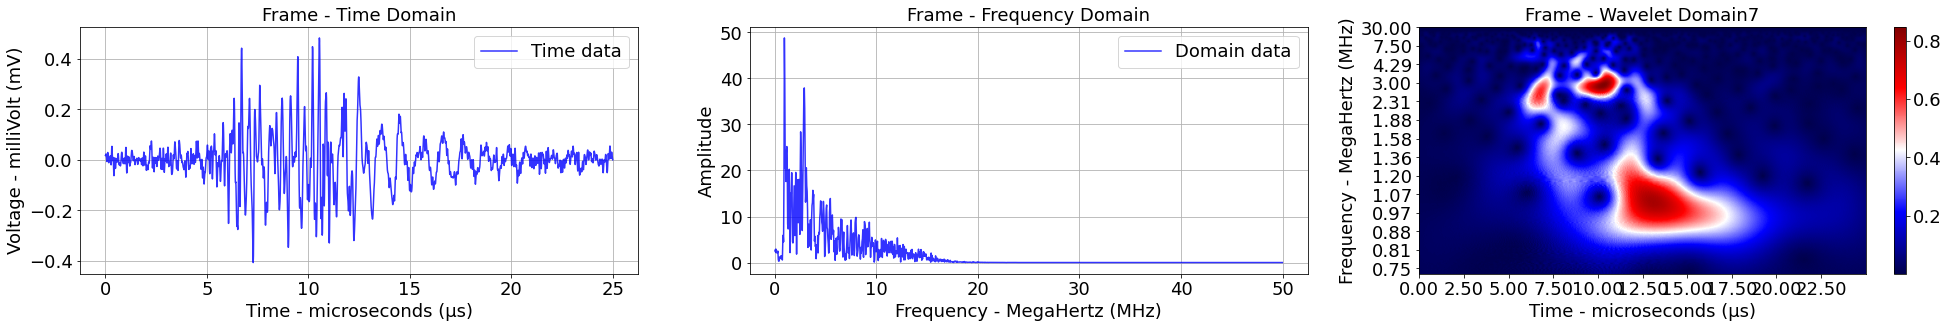

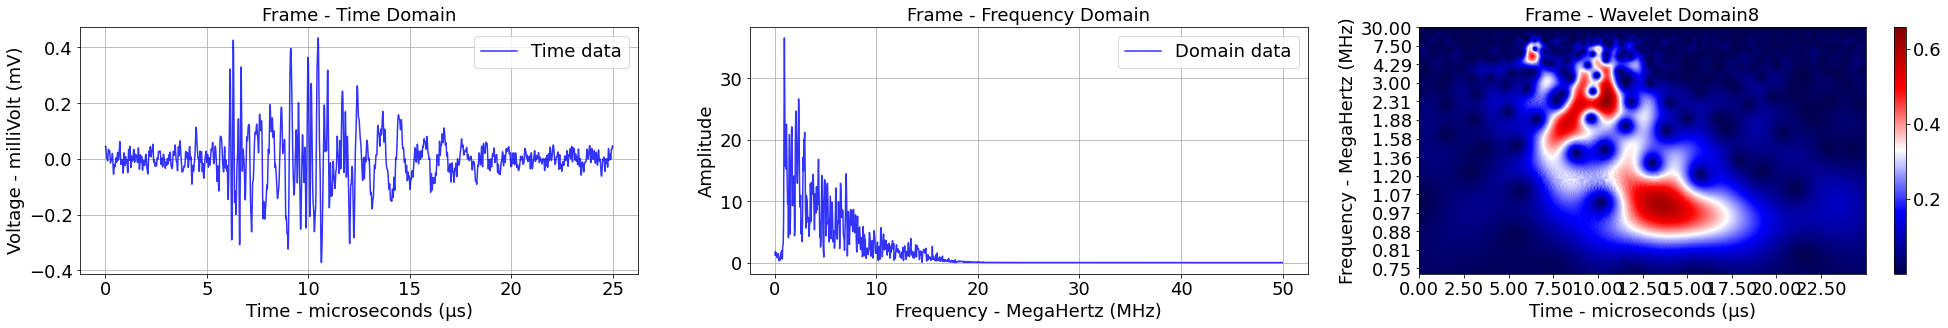

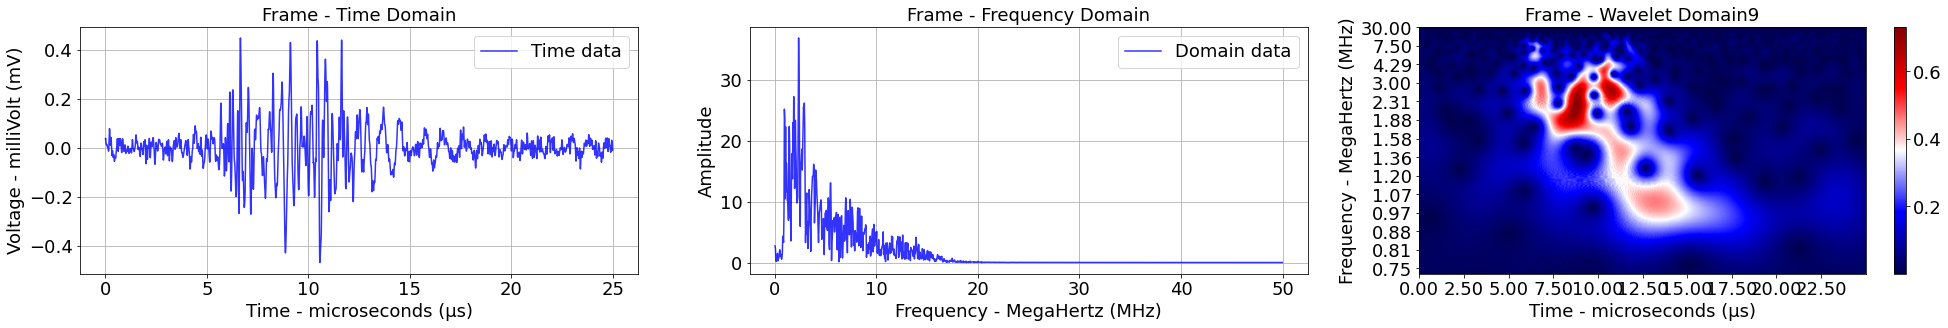

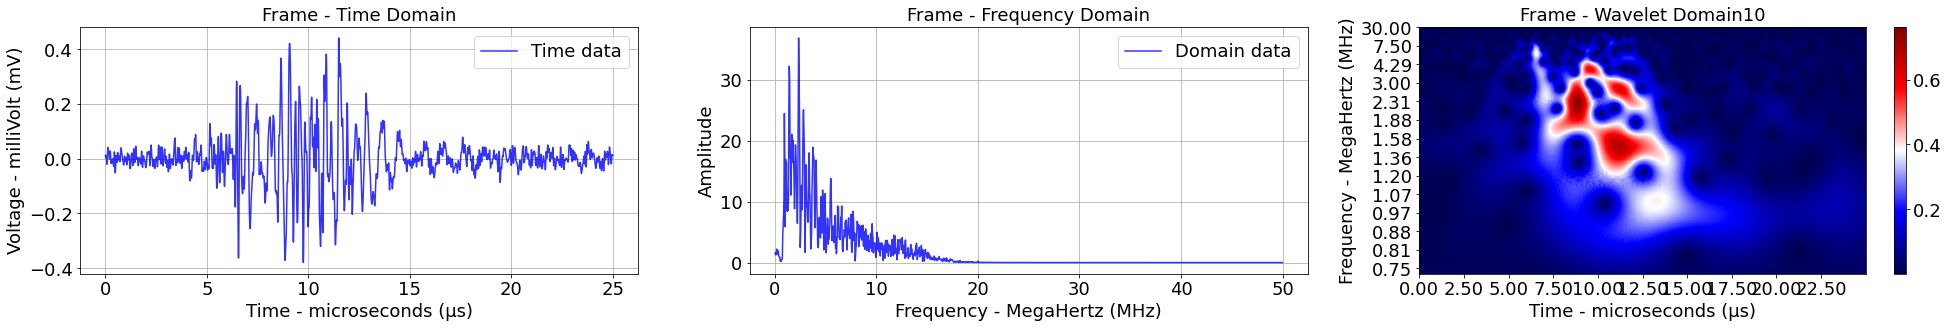

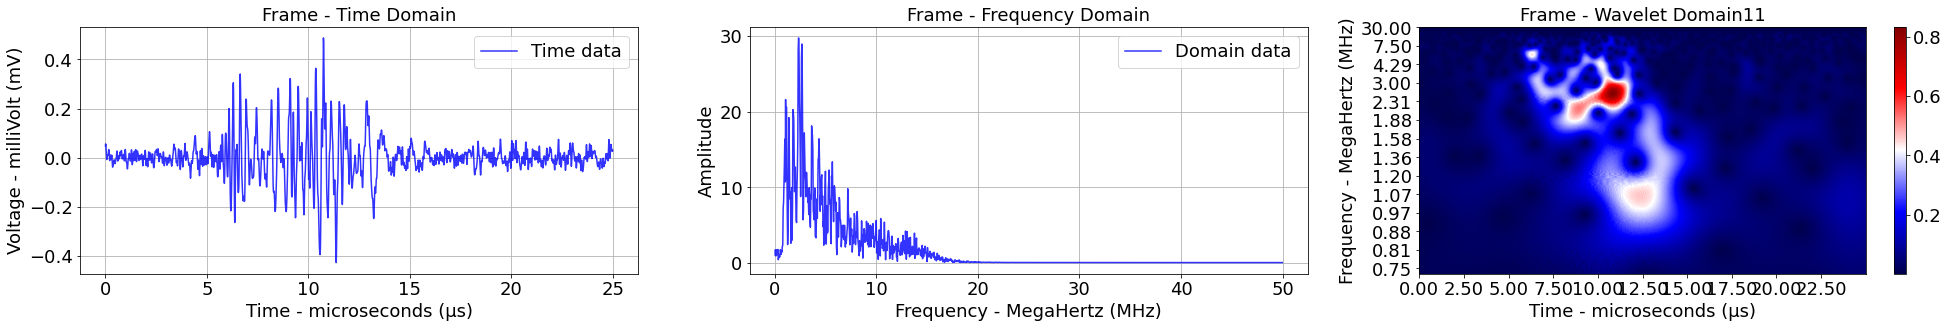

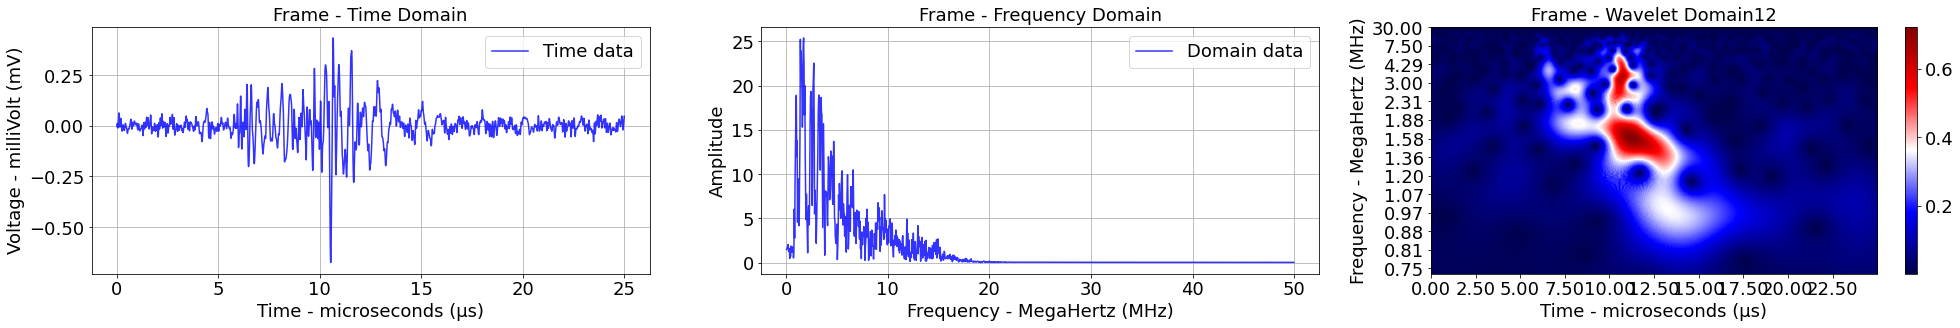

100%|██████████| 1/1 [00:07<00:00,  7.46s/it]


In [65]:
#--------------------------------- ALL in one
#signal_list = [signal_o_1,signal_o_2,signal_o_3,signal_o_4,signal_o_5,signal_o_6,signal_o_7,signal_o_8,signal_c_1,signal_c_2,signal_c_3,signal_c_4,signal_c_5]
signal_list = [signal_dp_15]

for l in range(0,len(signal_list)):
    signal_path = signal_list[l]
    print("---------------------",signal_path)  
    signal_trackdata = io.loadmat(signal_path)
    signal_data = signal_trackdata['saved_data'];

    if (signal_path==signal_o_7 or signal_path==signal_c_2): # These 2 groups belonge to the same date need spesial treatment have different sonication frequency 
        step = 26666
        peaks_frames_locations = [i for i in np.arange(6800,len(signal_data[0]),step)]
        peaks_frames_locations.pop()
        peaks_frames_locations.pop()
        peaks_frames_locations.pop()
        peaks_frames_locations.pop()
    elif (signal_path==signal_dp_23):
        step = 80000
        peaks_frames_locations = [i for i in np.arange(6800,len(signal_data[0]),step)]
        peaks_frames_locations.pop()        
    else:
        step = 80000
        peaks_frames_locations = [i for i in np.arange(6800,len(signal_data[0]),step)]
        peaks_frames_locations.pop()
    peaks_frames_locations = np.array(peaks_frames_locations) 
    print(len(peaks_frames_locations))
    peaks_frames_amplitude = np.zeros((len(peaks_frames_locations)))
    for p in range(0,len(peaks_frames_amplitude)):
        peaks_frames_amplitude[p] = 0.2
        
    if( signal_path == signal_o_8 or signal_path == signal_c_5 or signal_path == signal_c_3 or signal_path == signal_c_4):
        frame_size = 2000
        widths = np.arange(5, 205) 
        bandwidth = 0.8
        center_frequency = 1.5
    else:
        frame_size = 2500
        widths = np.arange(5, 205) 
        bandwidth = 1.5 #0.4
        center_frequency = 1.5 #3
        
    for burst_pivot in tqdm(range (14,15)):
        burst_data = signal_data[burst_pivot]
        Plot_Time_Signal_with_Spikes(burst_data,peaks_frames_locations,peaks_frames_amplitude)
        Plot_Frame_Time_FFT_CTW(peaks_frames_locations,burst_data,frame_size,widths,bandwidth,center_frequency)
        